In [48]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
from ROOT import gROOT
ROOT.TH1.AddDirectory(False)

# gROOT.Reset()

# myStyle = ROOT.TStyle('myStyle', 'my very own graphics style')
# myStyle.SetCanvasColor(ROOT.kGreen)
# ROOT.gROOT.SetStyle('myStyle')

### I wish to extract data from a 'tree' and plot it as a histogram

In [49]:
myFile = ROOT.TFile.Open("data/deuterated-digitizer_1.root")
myTree = myFile.Get('events')

energy = np.zeros(1, dtype=np.float64)
detector = np.zeros(1, dtype=np.ulonglong)

myTree.SetBranchAddress('energy', energy)
myTree.SetBranchAddress('detectorId', detector)


histograms = {}

binnum = 2**14
binmin = 0
binmax = 2**14

In [53]:
ROOT.TH1F.AddDirectory(False)

h1 = ROOT.TH1F('hist_det1', 'Hisstogram 1', binnum, binmin, binmax)
for entriy in range(myTree.GetEntries()//1000):
    
    h1.Fill(energy)

# for entry in range(myTree.GetEntries()//1000):
#     myTree.GetEntry(entry)
    
#     if detector[0] not in histograms:
#         histograms[detector[0]] = ROOT.TH1F(f"hist_{detector[0]}", f"Energy Distribution - Detector {detector[0]}", binnum, binmin, binmax)
        
#     histograms[detector[0]].Fill(energy[0])

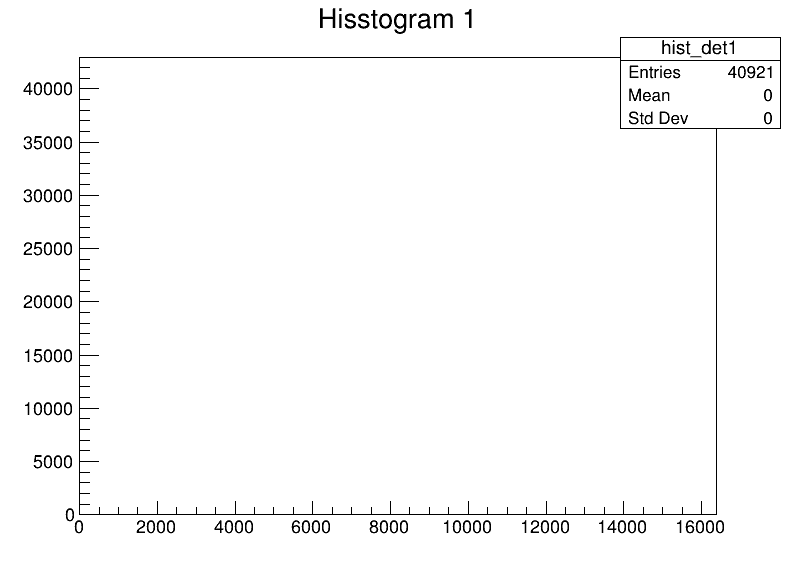

In [56]:
if "canvas" in ROOT.gROOT.GetListOfCanvases():
    ROOT.gROOT.GetListOfCanvases().FindObject("canvas").Close()

canvas = ROOT.TCanvas("canvas", "Histograms", 800, 600)
h1.Draw()

# canvas.Divide(2, 2)

# pad_index = 1
# for detector_id, histogram in histograms.items():
#     canvas.cd(pad_index)  # Activate the pad at the current index
#     histogram.Draw()
#     histogram.GetXaxis().SetTitle("Energy")
#     histogram.GetYaxis().SetTitle("Frequency")
#     pad_index += 1
    
canvas.Update()
canvas.Draw()

myFile.Close()

In [4]:
for i in entries:
    myTree.GetEntry(i)
    if detectorId == 1:
        myHist.Fill()

TypeError: 'int' object is not iterable

## How to get some information on a tree

In [ ]:
for branch in myTree.GetListOfBranches():
    print(branch.GetName())

In [42]:
myTree.Print()

******************************************************************************
*Tree    :events    : events tree                                            *
*Entries : 40921088 : Total =       818594595 bytes  File  Size =  505511653 *
*        :          : Tree compression factor =   1.62                       *
******************************************************************************
*Br    0 :detectorId : detectorId/s                                          *
*Entries : 40921088 : Total  Size=   81863683 bytes  File Size  =    9040487 *
*Baskets :      214 : Basket Size=    1280512 bytes  Compression=   9.05     *
*............................................................................*
*Br    1 :energy    : energy/s                                               *
*Entries : 40921088 : Total  Size=   81863766 bytes  File Size  =   65151098 *
*Baskets :      215 : Basket Size=    1280000 bytes  Compression=   1.26     *
*...................................................

#### ROOT way

In [8]:
myHist = ROOT.TH1F('histogram', 'Histogram of Data', binNum , binMin, binMax)

### attempt 1
for i in range(int(myData.size())):
    myHist.Fill(myData[i], myErr[i])

canvas = ROOT.TCanvas("canvas", "Histogram Canvas")
myHist.Draw()
canvas.Draw()

### attempt 2
# dataList = [myData[i] for i in range(len(myData))] #we attempt a solution by turning the vector into a python list
# myHist.Fill(myData[i], myError)

IndexError: index out of range

In [37]:
### with .ls() one can check the directory contents of a TFile
myFile.ls()

TFile**		data/deuterated-digitizer_1.root	
 TFile*		data/deuterated-digitizer_1.root	
  OBJ: TTree	events	events tree : 0 at: 0x7f86f25afaf0
  KEY: TTree	events;18	events tree [current cycle]
  KEY: TTree	events;17	events tree [backup cycle]


#### ROOT.RDataFrame way

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


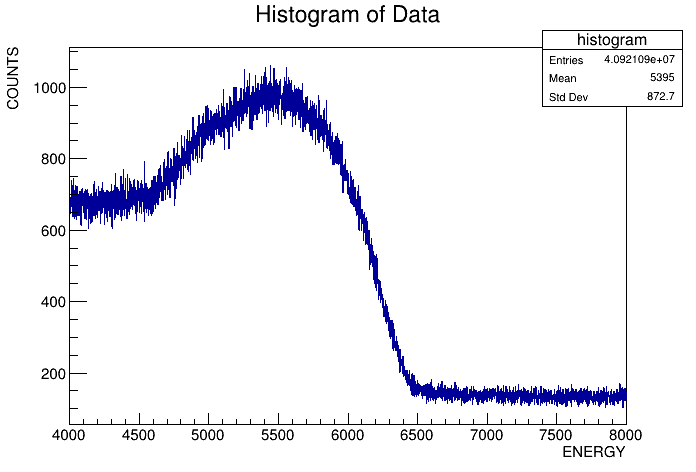

In [4]:
rdf = ROOT.RDataFrame(myTree)

histogram = rdf.Histo1D(('histogram', 'Histogram of Data; ENERGY; COUNTS', binNum, binMin, binMax), 'energy')
canvas = ROOT.TCanvas('canvas', 'Histogram Canvas')
histogram.GetXaxis().SetRangeUser(4000, 8000)
histogram.Draw()
canvas.Draw()

#### uproot (python library)

In [3]:
file = uproot.open("data/deuterated-digitizer_1.root")
tree = file['events']
branch = tree['energy']
data = branch.array()

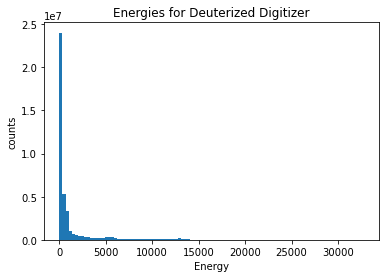

In [8]:
plt.hist(data, bins =100)
plt.xlabel('Energy')
plt.ylabel('counts')
plt.title('Energies for Deuterized Digitizer')
plt.show()